In [256]:
import pandas as pd

submodule = "carscraper"
prefix = "sauto_output"
date = "2020-8-10"
time="0-51-11"
file_format="csv"
path = "{sb}/outputs/{pre}_{dt}/{pre}_{dt}_{t}.{f}".format(sb=submodule, pre=prefix, dt=date, t=time, f=file_format)
df = pd.read_csv(path)
df

Unnamed: 0       brand    model  year  mileage   price          fuel  \
0               0  Alfa Romeo      145  2000   173335   19000        benzín   
1               1  Alfa Romeo      145  1997   208700   35000        benzín   
2               2  Alfa Romeo      146  1997   245940    9800  CNG + benzín   
3               3  Alfa Romeo      146  1998   200000   39000        benzín   
4               4  Alfa Romeo      146  2000   127880   43000        benzín   
...           ...         ...      ...   ...      ...     ...           ...   
77184       77184     Trabant    Kombi  1974    20400  199999        benzín   
77185       77185         TVR  Cerbera  1997    15900  599999        benzín   
77186       77186         UAZ  Ostatní  1977     2157  449900        benzín   
77187       77187    Wartburg      353  1974    33946   99900        benzín   
77188       77188      ZhiDou       D2  2018       10  449900       elektro   

       gearbox                                                url  
0            1  http://sauto.cz/inzerce/osobni/detail/alfa-rom...  
1            1  http://sauto.cz/inzerce/osobni/detail/alfa-rom...  
2            1  http://sauto.cz/inzerce/osobni/detail/alfa-rom...  
3            1  http://sauto.cz/inzerce/osobni/detail/alfa-rom...  
4            1  http://sauto.cz/inzerce/osobni/detail/alfa-rom...  
...        ...                                                ...  
77184        1  http://sauto.cz/inzerce/osobni/detail/trabant/...  
77185        1  http://sauto.cz/inzerce/osobni/detail/tvr/cerb...  
77186        1  http://sauto.cz/inzerce/osobni/detail/uaz/osta...  
77187        1  http://sauto.cz/inzerce/osobni/detail/wartburg...  
77188        3  http://sauto.cz/inzerce/osobni/detail/zhidou/d...  

[77189 rows x 9 columns]

In [257]:
gearbox_types=df.gearbox.unique()
gearbox_types

array([1, 0, 3, 2], dtype=int64)

In [258]:
fuel_types=df.fuel.unique()
fuel_types

array(['benzín', 'CNG + benzín', 'nafta', 'LPG + benzín', 'hybridní',
       'elektro', 'ethanol'], dtype=object)

In [259]:
counts=df.groupby('gearbox').size().reset_index(name='counts')
counts['sauto.cz codebook'] = ['undefined', 'manual', 'semi automatic', 'automatic']
counts

gearbox  counts sauto.cz codebook
0        0    2545         undefined
1        1   50495            manual
2        2      38    semi automatic
3        3   24111         automatic

In [260]:
df.gearbox = df.gearbox.replace(to_replace=[0, 2], value=1)
df.gearbox = df.gearbox.replace(to_replace=3, value=0)

counts=df.groupby('gearbox').size().reset_index(name='counts')
counts['Carpricer codebook'] = ['automatic', 'manual']
counts

gearbox  counts Carpricer codebook
0        0   24111          automatic
1        1   53078             manual

In [261]:
X = df.drop(columns=["Unnamed: 0", "price", "url"])
Y = df[["price"]]
X

brand    model  year  mileage          fuel  gearbox
0      Alfa Romeo      145  2000   173335        benzín        1
1      Alfa Romeo      145  1997   208700        benzín        1
2      Alfa Romeo      146  1997   245940  CNG + benzín        1
3      Alfa Romeo      146  1998   200000        benzín        1
4      Alfa Romeo      146  2000   127880        benzín        1
...           ...      ...   ...      ...           ...      ...
77184     Trabant    Kombi  1974    20400        benzín        1
77185         TVR  Cerbera  1997    15900        benzín        1
77186         UAZ  Ostatní  1977     2157        benzín        1
77187    Wartburg      353  1974    33946        benzín        1
77188      ZhiDou       D2  2018       10       elektro        0

[77189 rows x 6 columns]

In [262]:
predicted_car = pd.DataFrame({"brand": ["Škoda"],
                              "model": ["Octavia"],
                              "year": [2016],
                              "mileage": [58233],
                              "fuel": ["nafta"],
                              "gearbox": [1]})
X = X.append(predicted_car)
X

brand    model  year  mileage          fuel  gearbox
0      Alfa Romeo      145  2000   173335        benzín        1
1      Alfa Romeo      145  1997   208700        benzín        1
2      Alfa Romeo      146  1997   245940  CNG + benzín        1
3      Alfa Romeo      146  1998   200000        benzín        1
4      Alfa Romeo      146  2000   127880        benzín        1
...           ...      ...   ...      ...           ...      ...
77185         TVR  Cerbera  1997    15900        benzín        1
77186         UAZ  Ostatní  1977     2157        benzín        1
77187    Wartburg      353  1974    33946        benzín        1
77188      ZhiDou       D2  2018       10       elektro        0
0           Škoda  Octavia  2016    58233         nafta        1

[77190 rows x 6 columns]

In [263]:
X1 = X.iloc[:, 0:6].values
X1

array([['Alfa Romeo', '145', 2000, 173335, 'benzín', 1],
       ['Alfa Romeo', '145', 1997, 208700, 'benzín', 1],
       ['Alfa Romeo', '146', 1997, 245940, 'CNG + benzín', 1],
       ...,
       ['Wartburg', '353', 1974, 33946, 'benzín', 1],
       ['ZhiDou', 'D2', 2018, 10, 'elektro', 0],
       ['Škoda', 'Octavia', 2016, 58233, 'nafta', 1]], dtype=object)

In [264]:
Y = Y.iloc[:, 0:2].values
Y

array([[ 19000],
       [ 35000],
       [  9800],
       ...,
       [449900],
       [ 99900],
       [449900]], dtype=int64)

In [265]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([("gearbox", OneHotEncoder(drop='first'), [5])], 
                       remainder='passthrough')
X1 = ct.fit_transform(X1)
X1

array([[1.0, 'Alfa Romeo', '145', 2000, 173335, 'benzín'],
       [1.0, 'Alfa Romeo', '145', 1997, 208700, 'benzín'],
       [1.0, 'Alfa Romeo', '146', 1997, 245940, 'CNG + benzín'],
       ...,
       [1.0, 'Wartburg', '353', 1974, 33946, 'benzín'],
       [0.0, 'ZhiDou', 'D2', 2018, 10, 'elektro'],
       [1.0, 'Škoda', 'Octavia', 2016, 58233, 'nafta']], dtype=object)

In [266]:
ct = ColumnTransformer([("fuel", OneHotEncoder(drop='first'), [5])], 
                       remainder='passthrough')
X1 = ct.fit_transform(X1)
X1

array([[0.0, 1.0, 0.0, ..., '145', 2000, 173335],
       [0.0, 1.0, 0.0, ..., '145', 1997, 208700],
       [0.0, 0.0, 0.0, ..., '146', 1997, 245940],
       ...,
       [0.0, 1.0, 0.0, ..., '353', 1974, 33946],
       [0.0, 0.0, 1.0, ..., 'D2', 2018, 10],
       [0.0, 0.0, 0.0, ..., 'Octavia', 2016, 58233]], dtype=object)

In [267]:
from pandas import DataFrame
old_cols=["fuel_type1", "fuel_type2", "fuel_type3", "fuel_type4", "fuel_type5", "fuel_type6", 
      "gearbox", "brand", "model", "year", "mileage"]
new_cols=["brand", "model", "year", "mileage", "fuel_type1", "fuel_type2", 
          "fuel_type3", "fuel_type4", "fuel_type5", "fuel_type6", "gearbox"]
df_arranged = DataFrame(data=X1, columns=old_cols)
df_arranged = df_arranged[new_cols]
df_arranged


brand    model  year mileage fuel_type1 fuel_type2 fuel_type3  \
0      Alfa Romeo      145  2000  173335          0          1          0   
1      Alfa Romeo      145  1997  208700          0          1          0   
2      Alfa Romeo      146  1997  245940          0          0          0   
3      Alfa Romeo      146  1998  200000          0          1          0   
4      Alfa Romeo      146  2000  127880          0          1          0   
...           ...      ...   ...     ...        ...        ...        ...   
77185         TVR  Cerbera  1997   15900          0          1          0   
77186         UAZ  Ostatní  1977    2157          0          1          0   
77187    Wartburg      353  1974   33946          0          1          0   
77188      ZhiDou       D2  2018      10          0          0          1   
77189       Škoda  Octavia  2016   58233          0          0          0   

      fuel_type4 fuel_type5 fuel_type6 gearbox  
0              0          0          0       1  
1              0          0          0       1  
2              0          0          0       1  
3              0          0          0       1  
4              0          0          0       1  
...          ...        ...        ...     ...  
77185          0          0          0       1  
77186          0          0          0       1  
77187          0          0          0       1  
77188          0          0          0       0  
77189          0          0          1       1  

[77190 rows x 11 columns]

In [268]:
from sklearn.preprocessing import LabelEncoder
X = df_arranged.iloc[:, 0:].values
leX = LabelEncoder()
X[:, 0] = leX.fit_transform(X[:, 0])
X[:, 1] = leX.fit_transform(X[:, 1])
X

array([[3, 16, 2000, ..., 0.0, 0.0, 1.0],
       [3, 16, 1997, ..., 0.0, 0.0, 1.0],
       [3, 17, 1997, ..., 0.0, 0.0, 1.0],
       ...,
       [84, 60, 1974, ..., 0.0, 0.0, 1.0],
       [85, 291, 2018, ..., 0.0, 0.0, 0.0],
       [86, 558, 2016, ..., 0.0, 1.0, 1.0]], dtype=object)

In [270]:
predicted_car = X[-1]
X = X[:-1, :]
X

array([[3, 16, 2000, ..., 0.0, 0.0, 1.0],
       [3, 16, 1997, ..., 0.0, 0.0, 1.0],
       [3, 17, 1997, ..., 0.0, 0.0, 1.0],
       ...,
       [81, 564, 1977, ..., 0.0, 0.0, 1.0],
       [84, 60, 1974, ..., 0.0, 0.0, 1.0],
       [85, 291, 2018, ..., 0.0, 0.0, 0.0]], dtype=object)

In [271]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

In [272]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_train

array([[ 0.99607612,  0.79598611,  0.99508499, ..., -0.11730698,
        -0.97042703, -1.47587949],
       [-1.15333957,  0.1560492 , -1.30775883, ..., -0.11730698,
         1.03047418,  0.6775621 ],
       [ 0.99607612,  0.24629671,  0.99508499, ..., -0.11730698,
        -0.97042703,  0.6775621 ],
       ...,
       [ 0.99607612, -0.61925899,  0.6661073 , ..., -0.11730698,
         1.03047418,  0.6775621 ],
       [ 0.99607612, -0.61925899,  0.83059614, ..., -0.11730698,
        -0.97042703,  0.6775621 ],
       [ 0.85513083,  0.98468546,  0.99508499, ..., -0.11730698,
        -0.97042703,  0.6775621 ]])

In [278]:
import keras

model = keras.Sequential()

# input layer, Dense(number of neurons per layer, attitude to evaluating, name, number of columns)
model.add(keras.layers.Dense(10, activation='relu', name="layer1", input_shape=(X_train.shape[1], )))
model.add(keras.layers.Dense(10, activation='relu', name="layer2"))
model.add(keras.layers.Dense(1, name="layer3"))                                         # output linear layer (the price only)

model.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error', 'cosine_proximity'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 10)                120       
_________________________________________________________________
layer2 (Dense)               (None, 10)                110       
_________________________________________________________________
layer3 (Dense)               (None, 1)                 11        
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [283]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=5, batch_size=16)

Train on 51716 samples, validate on 25473 samples
Epoch 1/5
51716/51716 [==============================] - 4s 77us/step - loss: 355460660872.5836 - mean_squared_error: 355460660872.5836 - mean_absolute_error: 192557.4390 - mean_absolute_percentage_error: 61.0669 - cosine_proximity: -1.0000 - val_loss: 228134200782.7356 - val_mean_squared_error: 228134200782.7356 - val_mean_absolute_error: 187867.9350 - val_mean_absolute_percentage_error: 61.0816 - val_cosine_proximity: -1.0000

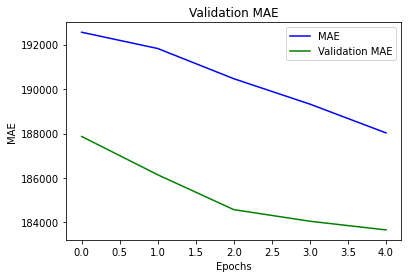

In [284]:
import matplotlib.pyplot as plt

# plt.plot(history.history['mean_squared_error'], 'bo', label='mse')
# plt.plot(history.history['val_mean_squared_error'], 'b', label='val_mse')
plt.plot(history.history['mean_absolute_error'], 'b', label='MAE')
plt.plot(history.history['val_mean_absolute_error'], 'g', label='Validation MAE')
# plt.plot(history.history['mean_absolute_percentage_error'], 'ro', label='mape')
# plt.plot(history.history['val_mean_absolute_percentage_error'], 'r', label='val_mape')
# plt.plot(history.history['cosine_proximity'], 'yo', label='cos')
# plt.plot(history.history['val_cosine_proximity'], 'y', label='val_cos')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Validation MAE')
plt.legend()

plt.show()

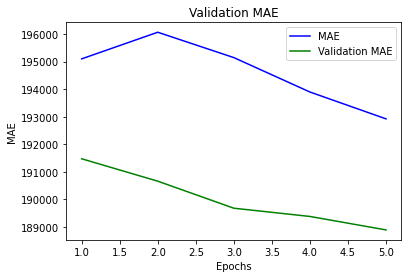

In [282]:
abs_error = history.history['mean_absolute_error'][:6]
val_abs_error = history.history['val_mean_absolute_error'][:6]

epochs = range(1, len(abs_error) + 1)

plt.plot(epochs, abs_error, 'b', label='MAE')
plt.plot(epochs, val_abs_error, 'g', label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Validation MAE')
plt.legend()

plt.show()

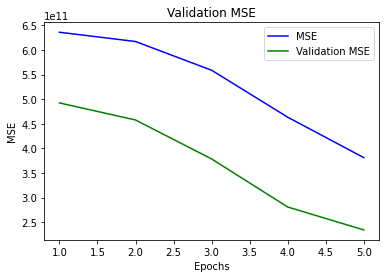

In [277]:
acc = history.history['mean_squared_error'][0:6]
val_acc = history.history['val_mean_squared_error'][0:6]
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='MSE')
plt.plot(epochs, val_acc, 'g', label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Validation MSE')
plt.legend()

plt.show()

In [287]:
prediction = model.predict(scaler.fit_transform([predicted_car]))
print(prediction)

[[228704.98]]
